# Bootcamp: Construa seu Portfólio em Ciência de Dados

**Autora**: Yanna Cavalcanti

**Data**: Junho 2023

---

## Projeto: Segmentação de clientes para campanha de marketing

#### Indústria e mercado

Esse projeto se enquadra na indústria automobilística. Empresas conhecidas nesse setor com time de ciência de dados no Brasil incluem **Ford**, **Fiat** e **Jeep** (da Fiat).

#### Contexto

Uma empresa automobilística tem planos de entrar em novos mercados com seus produtos existentes (C1, C2, C3, C4). Eles acreditam que o comportamento do novo mercado é semelhante ao seu mercado existente e, por isso, vão se basear nas informações que já possuem para criar estratégias de vendas. A equipe de marketing da empresa está buscando criar "personas" ou "avatares", ou seja, representações fictícias de clientes ideais para direcionar suas estratégias de marketing. Para isso, eles necessitam de uma segmentação de clientes utilizando a base de dados que eles adquiriram através de pesquisa. Para cada _avatar_, eles vão propor uma comunicação e um produto específico de acordo com o portfólio atual da empresa, que é o seguinte:

- **Carro C1**: Sedan espaçoso e confiável com aparência elegante que oferece um equilíbrio entre conforto, desempenho e economia. Possui reputação de confiabilidade e durabilidade, que o torna uma escolha sólida para as demandas do dia a dia. Além disso, ele possui um interior espaçoso, com assentos confortáveis e recursos de segurança avançados, proporcionando tranquilidade para o motorista e a família.
- **Carro C2**: Hatchback compacto e moderno, que combina estilo, eficiência e acessibilidade. Oferece um equilíbrio ideal entre praticidade e elegância. Com um orçamento baixo, ele proporciona economia de combustível e manutenção acessível. Além disso, possui design contemporâneo e recursos tecnológicos avançados. Seu tamanho compacto também facilita a condução em áreas urbanas movimentadas.
- **Carro C3**: Compacto econômico e versátil, com um orçamento baixo, esse veículo oferece eficiência de combustível e custos de manutenção acessíveis. Ele é ideal para deslocamentos diários e oferece praticidade em ambientes urbanos. Além disso, esse carro possui espaço suficiente para acomodar uma família grande, garantindo conforto e segurança para todos os ocupantes.
- **Carro C4**: SUV de luxo espaçoso e elegante, com um design sofisticado e tecnologia avançada. Combinando conforto e estilo,é para quem valoriza qualidade e prestígio. Possui assentos confortáveis e recursos de segurança de última geração.

#### Objetivo

Sua tarefa é desenvolver uma clusterização a partir dos dados existentes que forneça características significativas para cada cluster ou segmento de maneira que a equipe de marketing consiga construir os avatares e as melhores estratégias para cada um. É importante que você consiga enxergar e propor sugestões de avatares e produtos para garantir que os clusters estão fazendo sentido não apenas do ponto de vista técnico, mas também de negócio.

Além disso, após a clusterização e criação de avatares, você deve verificar nos dados não-vistos ou de teste se de fato as características se mantém para o novo público.

**ATENÇÃO**: Tenha em mente que a clusterização é um processo bastante iterativo e pode ser necessário que você teste diferentes técnicas de pré-processamento e combinação de features até chegar a um resultado relevante. Além disso, seus avatares não precisam ser construídos apenas a partir das features utilizadas nos clusters, mas você pode descrever cada cluster com todas as features, mesmo as que não permanecerem no seu processo de clusterização.

#### Dataset

- **Dataset Source:** [Kaggle](https://www.kaggle.com/datasets/vetrirah/customer)


## EDA e pré-processamento

Primeiro, vamos ler o dataset. O dataset original possui uma segmentação inerente que não vamos utilizar, pois nosso objetivo é criar nossa própria segmentação.

In [1]:
import pandas as pd

# Removemos a coluna de segmentação, pois não vamos utilizar
df_train = pd.read_csv("/kaggle/input/customer/Train.csv").drop(columns = ["Segmentation"])
df_test = pd.read_csv("/kaggle/input/customer/Test.csv")

# Primeiras linhas do dataset de treino
df_train.head(3)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6


### EDA de variáveis numéricas

#### **Tarefa**: Selecione as variáveis numéricas  *.select_dtypes()*
[Pandas select_dtypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html)

In [2]:

cont_cols = df_train.select_dtypes(include="number").columns.tolist()
cont_cols.remove("ID")

#### **Tarefa**: Visualize os gráficos de dispersão e histograma dessas variáveis conjuntamente com [Seaborn pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)


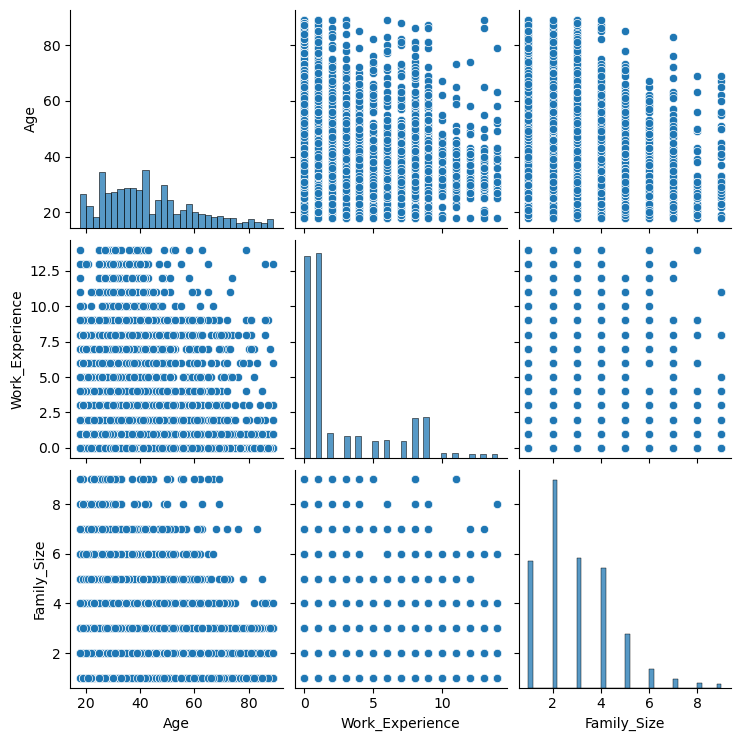

In [3]:
import seaborn as sns

sns.pairplot(df_train[cont_cols])

### EDA de variáveis categóricas

#### **Tarefa**: Selecione as variáveis categóricas com  *.select_dtypes()*
[Pandas select_dtypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html)

In [4]:

cat_cols = df_train.select_dtypes(exclude="number").columns.tolist()
df_train[cat_cols].head()

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1
0,Male,No,No,Healthcare,Low,Cat_4
1,Female,Yes,Yes,Engineer,Average,Cat_4
2,Female,Yes,Yes,Engineer,Low,Cat_6
3,Male,Yes,Yes,Lawyer,High,Cat_6
4,Female,Yes,Yes,Entertainment,High,Cat_6


#### **Tarefa**: Utilize  *.map()* para mapear as categorias de "Spending Score" para números inteiros de 0 a 2
[Pandas map](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html)

In [5]:
df_train.Spending_Score = df_train.Spending_Score.map({'Low':0, 'Average':1, 'High':2})
df_test.Spending_Score = df_test.Spending_Score.map({'Low':0, 'Average':1, 'High':2})

#### **Tarefa**: Visualize como o "Spending Score" se comporta para cada "Profession" utilizando *.groupby()* e *.describe()*

In [6]:

df_train.groupby("Profession")["Spending_Score"].describe()

,count,mean,std,min,25%,50%,75%,max
Profession,,,,,,,,
Artist,2516.0,0.594197,0.658535,0.0,0.0,0.0,1.0,2.0
Doctor,688.0,0.347384,0.563281,0.0,0.0,0.0,1.0,2.0
Engineer,699.0,0.487840,0.649715,0.0,0.0,0.0,1.0,2.0
Entertainment,949.0,0.433087,0.585515,0.0,0.0,0.0,1.0,2.0
Executive,599.0,1.454090,0.818359,0.0,1.0,2.0,2.0,2.0
Healthcare,1332.0,0.099099,0.396187,0.0,0.0,0.0,0.0,2.0
Homemaker,246.0,0.455285,0.679160,0.0,0.0,0.0,1.0,2.0
Lawyer,623.0,1.069021,0.983818,0.0,0.0,2.0,2.0,2.0
Marketing,292.0,0.284247,0.656471,0.0,0.0,0.0,0.0,2.0


#### **Tarefa**: Crie um plot com barras com o count() por categoria para cada variável categórica que você selecionou lá em cima e coloque-as todas na mesma figura através de subplots e utilizando um loop **for**

Existem muitas maneiras de chegar a esse plot. Em uma delas, você pode utilizar as seguintes funções:

[Values count](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html)

[Iterating Through Each Figure](https://napsterinblue.github.io/notes/python/viz/subplots/)

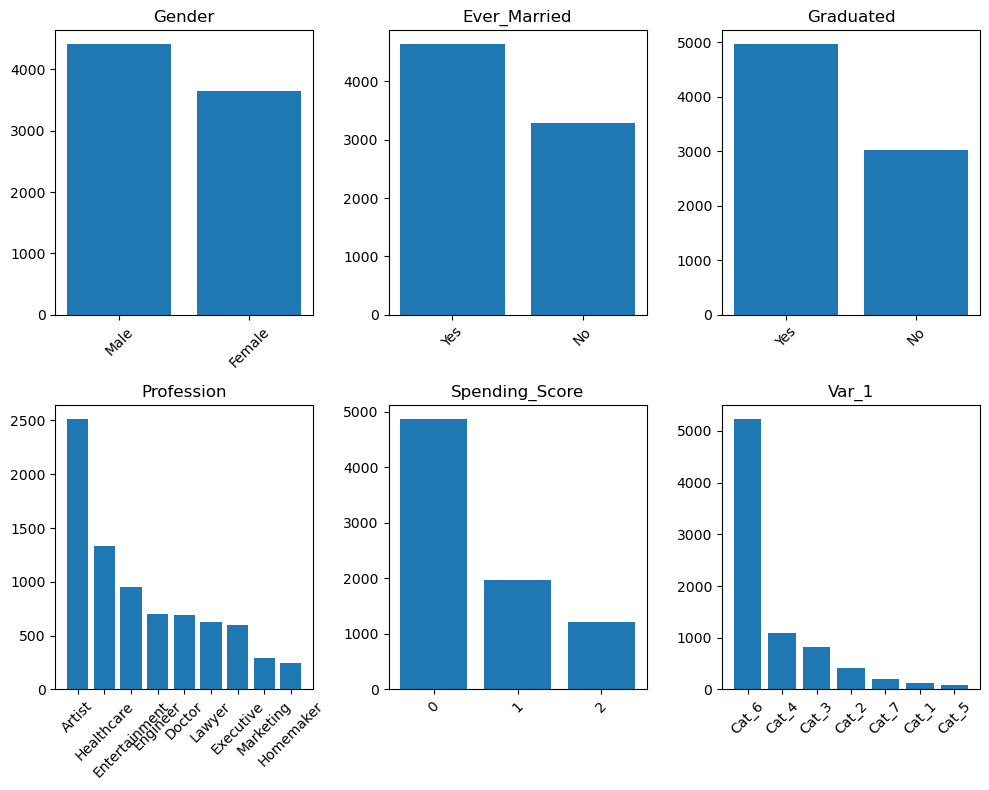

In [7]:
import matplotlib.pyplot as plt


# Cria uma figura
fig, axes = plt.subplots(nrows=2, ncols=round(len(cat_cols)/2), figsize=(10, 8))

# Plot de dados em cada subplot
for i, ax in enumerate(axes.flat):
    col = cat_cols[i]
    counts = df_train[col].value_counts().reset_index()
    ax.bar(counts['index'], counts[col])
    ax.set_title(col)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels by 45 degrees


# Ajusta o layout e mostra o plot
plt.tight_layout()
plt.show()

### Transformação de variáveis categóricas para numéricas

Vamos implementar 3 formas de fazer one-hot-encoding:
- **Manual**: Para as variáveis binárias, utilize **.map()** ou **.replace** para transformá-las em 0 ou 1
- **Pandas one-hot-encoding**: Utilize [pd.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) para transformar variáveis de múltiplas categorias em colunas
- **Label encoding**: Criar um dicionário relacionando as categorias da variável de interesse a números ordinais (similar ao **manual** mas para múltiplas classes) e substituir na variável original. Aplique à variável anonimizada **Var_1** e quaisquer outras que ache devido.

#### **Pergunta**: Em que situação devemos utilizar one-hot encoding e em que situações podemos usar o label encoding?

#### **Resposta**:

Só podemos transformar categorias em números nos casos em que as categorias de alguma forma signifiquem algo ordinal, como no caso do Spending Score. Por isso, não podemos usar essa abordagem para o caso de "Profession".

In [8]:
def get_encoded_dict(df,lst):
    encoded_dict = {}
    for col in lst:
        each_dict = {}
        sorted_unique_names = df[col].dropna().unique()
        sorted_unique_names.sort()
        for i,val in enumerate(sorted_unique_names):
            each_dict[val] = i
        encoded_dict[col] = each_dict
    return encoded_dict
encoded_dict = get_encoded_dict(df_train,["Var_1"])

encoded_train = df_train.replace(encoded_dict)
encoded_test = df_test.replace(encoded_dict)

In [9]:
import seaborn as sns
import numpy as np


binary_cols = ["Gender", "Ever_Married", "Graduated"]
multiclass_cols = ["Profession"]

encoded_train = pd.get_dummies(encoded_train.drop(columns = "Spending_Score"))
encoded_test = pd.get_dummies(encoded_test.drop(columns = "Spending_Score"))

for col in binary_cols:
    tmp_cols = [x for x in encoded_train.columns if col in x]
    encoded_train.drop(columns = [tmp_cols[1]], inplace = True)
    encoded_test.drop(columns = [tmp_cols[1]], inplace = True)

### Limpeza de dados

#### **Tarefa**: Verifique se há duplicatas nos dados com **.drop_duplicates()**

In [11]:
# Checando duplicatas
print("Duplicatas:", encoded_train.shape[0]-encoded_train.drop_duplicates().shape[0])

Duplicatas: 0


#### **Tarefa**: Conte quantos NaNs há por coluna

In [12]:
# Checando nans
encoded_train.isna().sum()

ID                            0
Age                           0
Work_Experience             829
Family_Size                 335
Var_1                        76
Gender_Female                 0
Ever_Married_No               0
Graduated_No                  0
Profession_Artist             0
Profession_Doctor             0
Profession_Engineer           0
Profession_Entertainment      0
Profession_Executive          0
Profession_Healthcare         0
Profession_Homemaker          0
Profession_Lawyer             0
Profession_Marketing          0
dtype: int64

#### **Tarefa**: Remova as linhas que possuem mais de 3 colunas com NaNs

**Dica**: você pode somar na dimensão das linhas utilizando **.sum(axis=1)**

In [13]:
# Removendo nans comuns
original_shape = encoded_train.shape[0]
encoded_train = encoded_train[encoded_train.isna().sum(axis=1)<3]
encoded_test = encoded_test[encoded_test.isna().sum(axis=1)<3]
print("# de NaNs removidos:", original_shape-encoded_train.shape[0])

# de NaNs removidos: 3


### Imputando valores faltantes

A imputação é uma técnica utilizada para tratar valores ausentes em conjuntos de dados. Quando temos dados incompletos, seja por falhas na coleta ou por outros motivos, a imputação pode ser aplicada para preencher esses valores faltantes de forma a manter a integridade e a qualidade dos dados. Existem várias abordagens para a imputação, mas aqui você vai aplicar e testar as seguintes:
- a substituição por estatísticas descritivas, como a média ou a mediana dos valores existentes
- o uso de modelos estatísticos mais avançados para estimar os valores ausentes com base em outras variáveis, como KNN.



#### **Tarefa**: Crie uma função de imputação utilizando ou a média **.mean()** ou a mediana **.median()**

In [14]:
def impute_columns(df, col):
    df.loc[df[col].isna(), col] = df[col].median()
    return df

# Coloque as colunas a serem imputadas por esse método
impute_cols = []
for col in impute_cols:
    imputed_median = impute_columns(encoded_train, col)

#### **Tarefa**: Crie uma função de imputação utilizando KNN

**Revisão de KNN**

O algoritmo de KNN (K-Nearest Neighbors) pode ser utilizado para imputação de valores faltantes em conjuntos de dados. Nesse contexto, o KNN é usado como uma abordagem de imputação baseada em vizinhos próximos.


![KNN](https://pub.mdpi-res.com/energies/energies-12-00916/article_deploy/html/images/energies-12-00916-g001-550.jpg?1571205932)


A ideia básica é identificar os K vizinhos mais próximos de uma amostra $k$ com valor ausente e utilizar os valores desses vizinhos para preencher o valor faltante. A distância entre as amostras é calculada usando alguma métrica de similaridade, como a **distância euclidiana**:
$$ d = \sqrt{{(x_2 - x_1)^2 + (y_2 - y_1)^2}}, $$

onde $x_k$ e $y_k$ são as componentes ou variáveis da amostra $k$.

O processo de imputação usando o KNN envolve os seguintes passos:
1. Identificar as amostras que possuem valores ausentes.
2. Para cada amostra com valor ausente, calcular a distância em relação a todas as outras amostras.
3. Selecionar os K vizinhos mais próximos da amostra com valor ausente.
4. Utilizar os valores desses vizinhos para imputar o valor faltante na amostra.

A escolha do valor a ser imputado pode variar de acordo com o problema em questão. Pode-se utilizar a média, a mediana ou até mesmo o valor mais frequente entre os vizinhos mais próximos.

Uma consideração importante na imputação usando o KNN é a escolha adequada do valor de K. Um valor muito baixo pode levar a uma imputação mais sensível a outliers, enquanto um valor muito alto pode resultar em uma imputação menos precisa.

É importante ressaltar que a imputação usando o KNN tem suas limitações. Em conjuntos de dados com muitos valores ausentes, a imputação pode ser menos precisa devido à falta de informações suficientes para encontrar vizinhos próximos. Além disso, é essencial avaliar a qualidade da imputação e considerar o impacto dela nos resultados finais.

Em conjunto de dados muito grandes, essa abordagem poder ser muito lenta e tornar-se inviável.

[Sklearn KNN imputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)

In [20]:

from sklearn.impute import KNNImputer

imputer = KNNImputer()

imputed_train = encoded_train.set_index("ID")
imputed_test = encoded_test.set_index("ID")

X = pd.DataFrame(data = imputer.fit_transform(imputed_train), columns = imputed_train.columns.tolist(), index = encoded_train.ID.values)
X_test = pd.DataFrame(data = imputer.transform(imputed_test), columns = imputed_test.columns.tolist(), index = encoded_test.ID.values)

### Normalização ou _scaling_ das features



Scaling é um processo utilizado na análise de dados para normalizar as variáveis, ou seja, colocá-las em uma escala comum para que possam ser comparadas de forma adequada. Isso é necessário porque as variáveis muitas vezes possuem escalas diferentes e podem ter uma influência desproporcional na clusterização. Aqui vamos explorar duas técnicas de scaling:

#### **Min-max**
O Min-Max Scaler uma técnica de scaling que transforma os dados para que eles fiquem dentro de um intervalo específico, geralmente entre 0 e 1, usando a seguinte fórmula:
$$ x_{\text{scaled}} = \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)} \times (\text{max}_{\text{new}} - \text{min}_{\text{new}}) + \text{min}_{\text{new}},
$$
onde:
- $x$: Valor original da característica.
- $x_{\text{scaled}}$: Valor escalonado da característica após a aplicação do Min-Max Scaling.
- $min_{\text{new}}$: Valor mínimo desejado para a nova escala.
- $max_{\text{new}}$: Valor máximo desejado para a nova escala.

O Min-Max Scaler é útil quando queremos manter a informação relativa da escala original dos dados e garantir que eles estejam em um intervalo específico.

#### **Z-score**
O Z-score é uma técnica de scaling que transforma os dados de forma que a média seja igual a zero e o desvio padrão seja igual a um. O Z-score é útil quando queremos comparar os valores em termos de desvios padrão da média.

A fórmula para calcular o Z-score é dada por:

$$Z = \frac{(X - \mu)}{\sigma},$$
onde:
- \( $Z$ \) é o Z-score do valor \( $X$ \);
- \( $X$ \) é o valor específico que estamos analisando;
- \( $\mu$ \) é a média dos dados;
- \( $\sigma$ \) é o desvio padrão dos dados.

Um Z-score positivo indica que o valor está acima da média, enquanto um Z-score negativo indica que o valor está abaixo da média. Um Z-score próximo de zero significa que o valor está próximo da média.



A escolha entre o Z-score e o Min-Max Scaler depende do contexto e das características dos dados. O Z-score é mais adequado quando queremos remover a influência da média e do desvio padrão, e quando estamos interessados em analisar a posição relativa dos valores. Por outro lado, o Min-Max Scaler é mais adequado quando queremos manter a informação relativa da escala original dos dados e quando estamos interessados em preservar as diferenças proporcionais entre os valores.

##### **Tarefa**: Aplique o [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) e o [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) aos dados

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

num_cols = ['Age','Work_Experience','Family_Size','Var_1']
bin_cols = [x for x in X.columns if "Profession" in x]+[x for x in X.columns if "Ever_Married" in x]+[x for x in X.columns if "Graduated" in x]

X[num_cols] = minmax_scaler.fit_transform(X[num_cols])

# Lembre-se que no teste devemos aplicar o scaler previamente calculado
X_test[num_cols] = minmax_scaler.transform(X_test[num_cols])

##### **Pergunta**: O que acontece quando aplicamos MinMax às colunas binárias? E o z-score?

##### Resposta: 
Ao aplicar MinMax, as colunas binárias não sofrem alteração. Já o z-score tenta garantir que a coluna não tenha uma influência desproporcional na clusterização, caso esteja sendo combinada com outras variáveis.


## Clusterização

A clusterização é uma técnica de aprendizado de máquina não supervisionado que visa agrupar dados semelhantes em conjuntos distintos chamados de clusters. O objetivo da clusterização é descobrir padrões intrínsecos nos dados, identificando grupos naturalmente existentes sem a necessidade de rótulos ou informações prévias. O método de clusterização que iremos aplicar é o K-means.

### K-means

O algoritmo K-means é um método popular de clusterização que agrupa dados em K clusters. Ele demanda do usuário apenas uma informação prévia, que é o número K de clusters a serem obtidos. Uma vez esse número determinado, o algoritmo consiste em:

- Inicializar os centroides dos clusters. Os centroides são pontos no espaço de características que representam o centro dos clusters. Eles podem ser inicializados de diferentes maneiras, como aleatoriamente ou com base em algum critério específico.

- Atribuir cada ponto de dados ao centroide mais próximo. Isso é feito calculando a distância entre cada ponto e os centroides e atribuindo o ponto ao centroide com a menor distância. A distância mais comumente usada é a **distância euclidiana**, vista acima.

- Recalcular os centroides dos clusters. Após cada ponto ser atribuído a um cluster, os centroides são recalculados, atualizando suas posições. Isso é feito calculando a média das coordenadas dos pontos atribuídos a cada centroide.

- Repitir iterativamente os passos 3 e 4 até que ocorra convergência, ou seja, até que não haja mais alteração nas atribuições dos pontos aos clusters ou nas posições dos centroides. O critério de parada pode ser definido com base em um número máximo de iterações ou quando uma mudança mínima nas atribuições ou posições é alcançada.

<img src="https://miro.medium.com/v2/resize:fit:1400/1*b2sO2f--yfZiJazc5rYSpg.gif" width="400" height="400">

Os clusters resultantes são representados pelos centroides finais. Cada ponto de dados é atribuído a um cluster com base na proximidade do centroide.

### Curva de Elbow

A curva de elbow, ou curva do cotovelo, é uma técnica utilizada para determinar o número ideal de clusters (K) em um algoritmo de clusterização, como o K-means. A ideia por trás dessa técnica é observar a relação entre o número de clusters e a variância explicada pelos clusters.

O procedimento para usar a curva de elbow no K-means é o seguinte:

1. Execute o algoritmo K-means para diferentes valores de K, começando a partir de um valor mínimo até um valor máximo que você deseja explorar.
2. Para cada valor de K, calcule a métrica de avaliação interna, geralmente a soma dos erros quadráticos dentro do cluster (SSE) ou a variância explicada.
3. Plote os valores de K no eixo x e as métricas de avaliação interna no eixo y.
4. Analise o gráfico resultante e observe o ponto onde a adição de mais clusters não resulta em uma melhora significativa na métrica de avaliação. Esse ponto é conhecido como "cotovelo".
5. Escolha o valor de K correspondente ao cotovelo como o número ideal de clusters.

A curva de elbow é chamada assim devido à sua forma que se assemelha a um cotovelo. O objetivo é encontrar o ponto em que o ganho adicional na variação explicada diminui significativamente, indicando que adicionar mais clusters não traz benefícios substanciais.

No entanto, é importante observar que a interpretação da curva de elbow é subjetiva e depende do contexto e dos dados específicos. Portanto, é recomendado realizar análises adicionais e considerar outras métricas de avaliação, bem como o conhecimento do domínio, para tomar a decisão final sobre o número ideal de clusters.

#### **Atenção**: A clusterização é um processo iterativo e pode precisar de diversas iterações até chegar ao objetivo de negócio desejado. É recomendável que você chegue a um número de clusters entre 3 e 5. As seguintes iterações são altamente recomendadas para te ajudar a atingir esse objetivo:
- Rodar com todas as variáveis
- Remover algumas variáveis, como as relacionadas a Gender e Profession
- Rodar com diferentes técnicas de Scaling
- Rodarcom diferentes técnicas de imputation

#### **Tarefa**: Construa uma curva de Elbow a partir dos resultados do K-means
[Exemplo de implementação](https://predictivehacks.com/k-means-elbow-method-code-for-python/)

In [22]:
from sklearn.cluster import KMeans

cols_to_drop = [x for x in X.columns if "Gender" in x]+[x for x in X.columns if "Profession" in x]

# Kmeans for Elbow
distortions = []
K = range(3,12)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=123)
    kmeanModel.fit(X.drop(columns = cols_to_drop))
    distortions.append(kmeanModel.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

#### **Tarefa**: Faça um plot da curva de Elbow

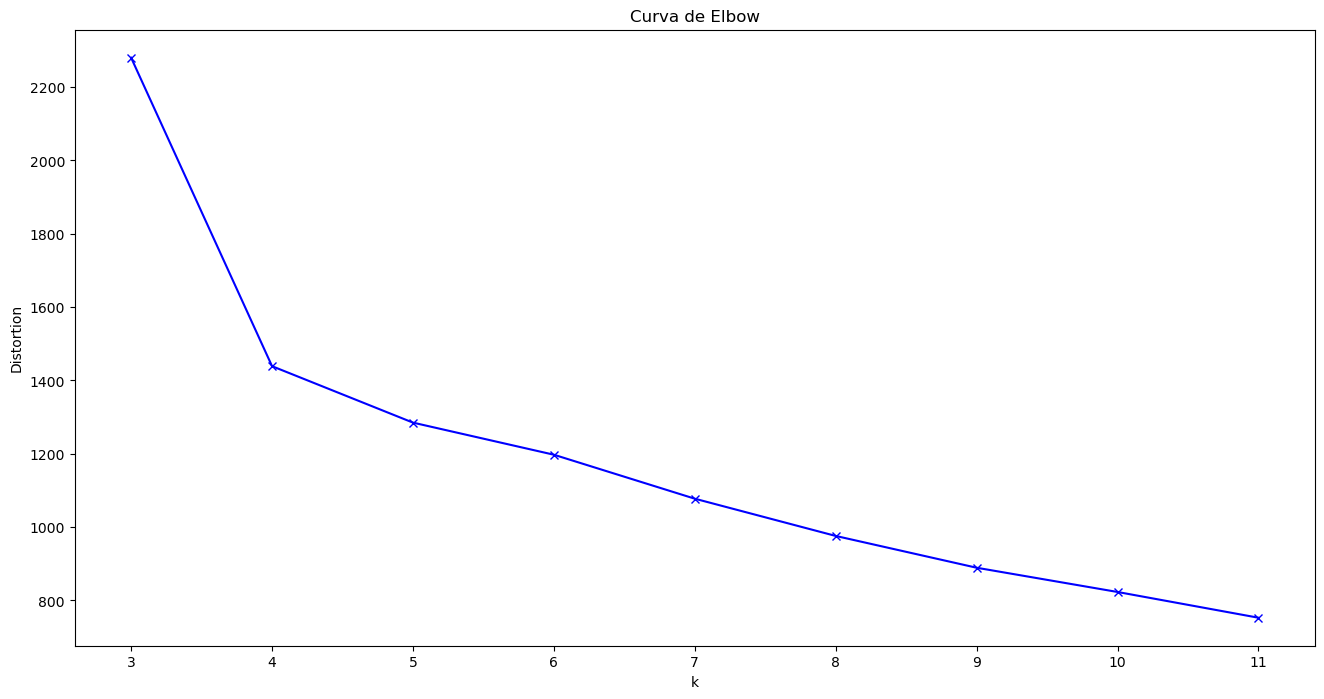

In [23]:
import matplotlib.pyplot as plt

# Plot Elbow curve
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Curva de Elbow')
plt.show()

#### **Pergunta**: Qual o número de clusters ideal segundo essa curva?

#### **Resposta**:
4

### PCA

Um método muito comumente utilizado para a redução de dimensionalidade das features antes da aplicacão da clusterização é a Análise de Componentes Principais (PCA - Principal Component Analysis). PCA é uma técnica de redução de dimensionalidade que busca capturar a maior parte da variabilidade dos dados em um número menor de dimensões, chamadas de componentes principais. 

O PCA é aplicado a conjuntos de dados multidimensionais, nos quais cada amostra é descrita por várias variáveis (ou features). O objetivo é transformar essas variáveis originais em um novo conjunto de variáveis, chamadas de componentes principais, que são combinações lineares das variáveis originais. Os componentes principais são ordenados de forma que o primeiro componente principal capture a maior variação dos dados, o segundo componente principal capture a segunda maior variação e assim por diante.

O processo do PCA pode ser resumido nos seguintes passos:

1. Padronização dos dados: É importante padronizar as variáveis originais para que elas tenham a mesma escala. Isso é feito subtraindo a média e dividindo pelo desvio padrão de cada variável.

2. Cálculo das matriz de covariância: A matriz de covariância é calculada a partir dos dados padronizados. Ela mede as relações lineares entre as variáveis originais.
$$ C = \frac{1}{n-1} \sum_{i=1}^{n} (z_i - \bar{z})(z_i - \bar{z})^T, $$
onde $n$ é o número de amostras, $z_i$ é o vetor de variáveis padronizadas para a amostra $i$ e $\bar{z}$ é o vetor médio das variáveis padronizadas.

3. Decomposição da matriz de covariância: A matriz de covariância é decomposta em autovetores e autovalores. Os autovetores representam as direções principais do espaço dos dados, e os autovalores representam a variância capturada por cada componente principal.
$$CV=\lambda V,$$
onde $V$ é uma matriz cujas colunas são os autovetores e $\lambda$ é um vetor contendo os autovalores correspondentes.

4. Seleção dos componentes principais: Os componentes principais são selecionados com base nos autovalores, ordenando-os do maior para o menor. Geralmente, escolhe-se um número de componentes principais que capture uma porcentagem significativa da variância total dos dados.

5. Projeção dos dados: Os dados originais são projetados nos componentes principais selecionados. Isso resulta em um novo conjunto de dados com menos dimensões, onde cada amostra é representada por seus valores nos componentes principais.

O PCA é amplamente utilizado em diversas áreas, como análise de dados, reconhecimento de padrões, visualização de dados e compressão de imagens. Ele permite reduzir a dimensionalidade dos dados, eliminar a multicolinearidade entre as variáveis e identificar padrões ocultos nos dados. Além disso, o PCA também pode ser utilizado para visualizar os dados em um espaço de menor dimensão, facilitando a interpretação e análise dos mesmos.

#### **Tarefa**: Aplique PCA com 2 componentes principais às features 
[Sklearn PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [24]:

from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=123)
df_pca = pd.DataFrame(pca.fit_transform(X.drop(columns = cols_to_drop)), columns = [0,1])
df_pca_test = pd.DataFrame(pca.transform(X_test.drop(columns = cols_to_drop)), columns = [0,1])

#### **Tarefa**: Construa um gráfico de dispersão das componentes principais

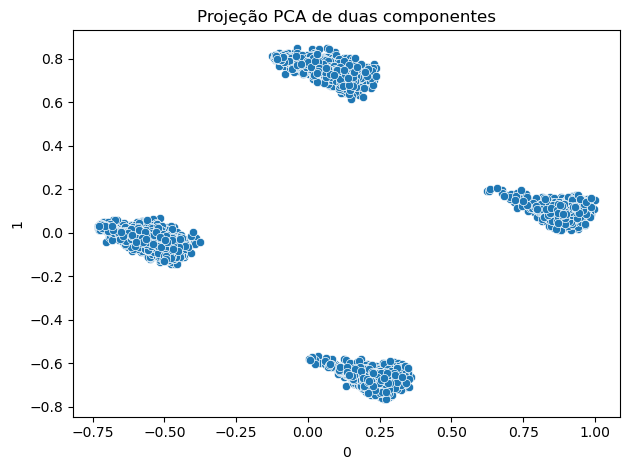

In [25]:
import seaborn as sns

sns.scatterplot(data=df_pca, x=0, y=1)
plt.title('Projeção PCA de duas componentes')
plt.tight_layout()
plt.show()

#### **Tarefa**: Construa um modelo K-means a partir do número de clusters ideal previamente encontrado

Lembre-se que o ideal é que você consiga chegar a um valor entre 3 e 6.

In [26]:

kmeansModel = KMeans(n_clusters=4, random_state=123)
y = kmeansModel.fit_predict(df_pca)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### **Tarefa**: Construa novamente um gráfico de dispersão das componentes principais, colorindo as amostras com as classes

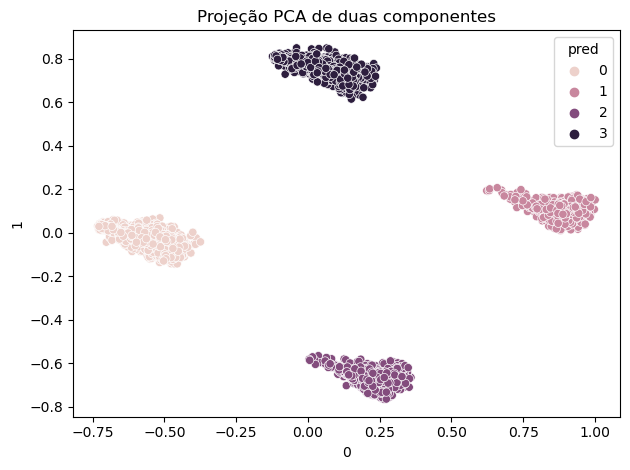

In [27]:
import seaborn as sns

df_pca["pred"] = y
sns.scatterplot(data=df_pca, x=0, y=1, hue="pred")
plt.title('Projeção PCA de duas componentes')
plt.tight_layout()
plt.show()

#### **Tarefa**: Una os IDs e predições com as tabelas iniciais para extrair as informações por cluster usando **.merge()**

In [28]:
final_df = encoded_train.drop(columns = cols_to_drop+cat_cols, errors = 'ignore')
final_df["pred"] = y
final_df = final_df.merge(df_train[["ID"]+cat_cols], on = "ID", how="left")

#### **Tarefa**: Verifique quantas amostras há por cluster usando **.groupby()** e **.count()**

In [29]:
final_df.groupby("pred")["ID"].count()

pred
0    3353
1    1591
2    1693
3    1428
Name: ID, dtype: int64

#### **Tarefa**: Plote um gráfico de barras para cada variável com as classes no eixo x, a variável categórica de interesse como "hue" e a contagem de clientes no eixo y

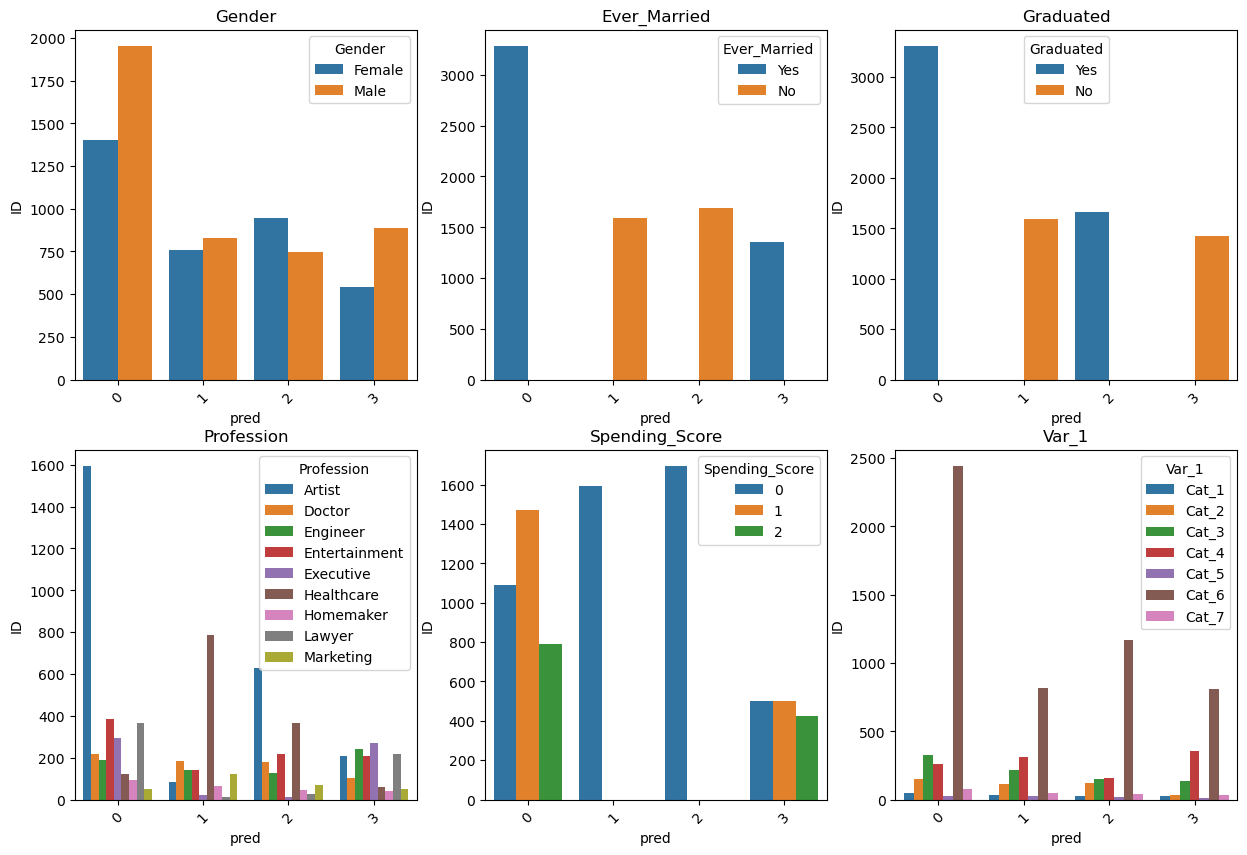

In [30]:

fig, axes = plt.subplots(nrows=2, ncols=round(len(cat_cols)/2), figsize=(15, 10))

for i, ax in enumerate(axes.flat):
    col = cat_cols[i]
    counts = final_df.groupby(["pred", col], as_index = False)["ID"].count()
    sns.barplot(final_df.groupby(["pred", col], as_index = False)["ID"].count(), x="pred", y="ID", hue=col, ax=ax)
    ax.set_title(col)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels by 45 degrees


#### **Tarefa**: Plot um histograma de idade por classe. Faça o mesmo para Family Size e Work Experience

Text(0.5, 0.98, 'Histograma de idade')

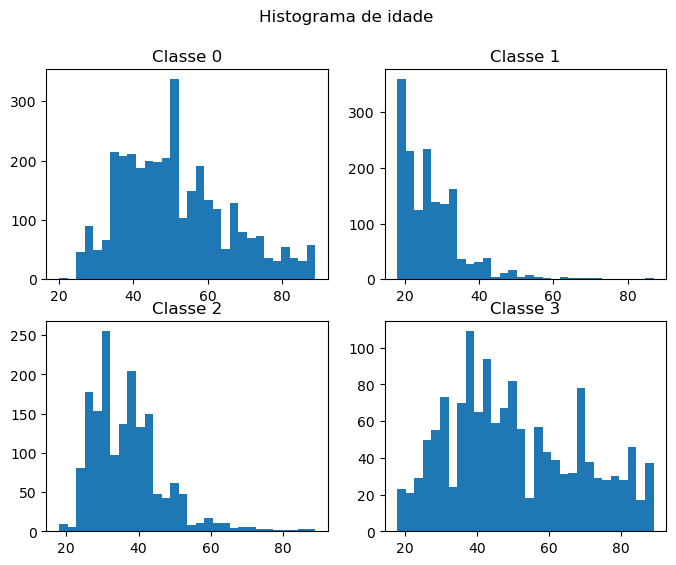

In [31]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

for i, ax in enumerate(axes.flat):
    ax.hist(final_df.loc[final_df.pred==i, "Age"], bins=30)
    ax.set_title("Classe "+str(i))

plt.suptitle("Histograma de idade")


Text(0.5, 0.98, 'Histograma de tamanho da família')

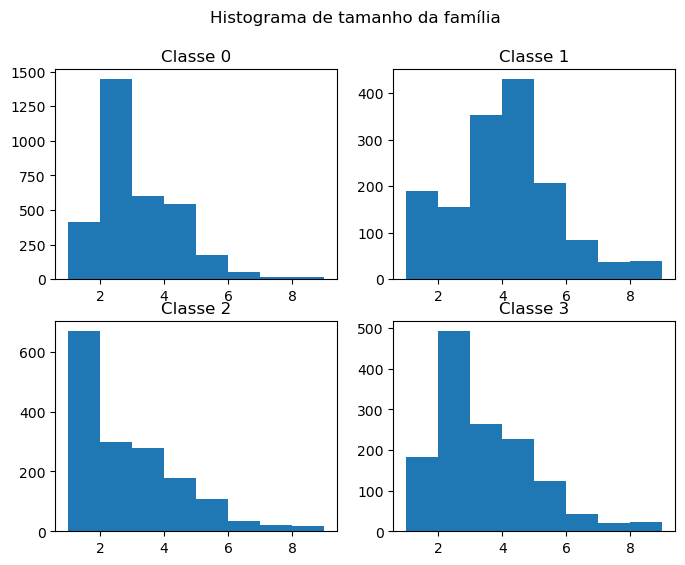

In [32]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

for i, ax in enumerate(axes.flat):
    ax.hist(final_df.loc[final_df.pred==i, "Family_Size"], bins=8)
    ax.set_title("Classe "+str(i))

plt.suptitle("Histograma de tamanho da família")


Text(0.5, 0.98, 'Histograma de anos de experiência de trabalho')

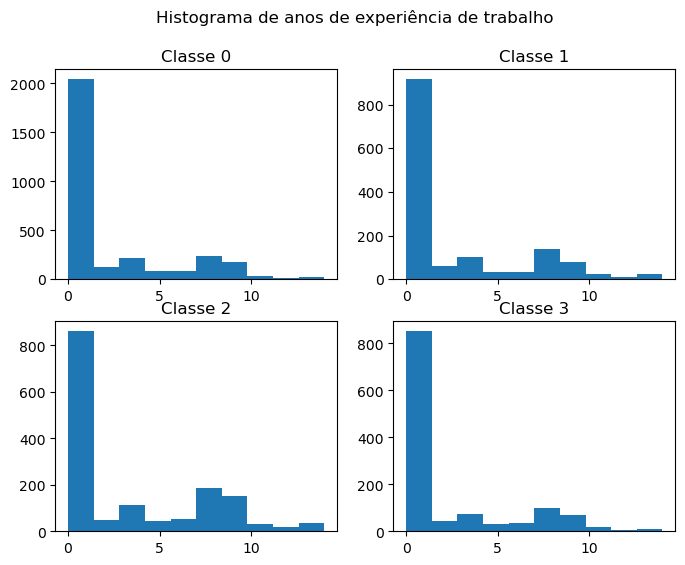

In [33]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

for i, ax in enumerate(axes.flat):
    ax.hist(final_df.loc[final_df.pred==i, "Work_Experience"], bins=10)
    ax.set_title("Classe "+str(i))

plt.suptitle("Histograma de anos de experiência de trabalho")


## Criação de avatares

A partir das análises feitas anteriormente, vamos criar os avatares ou personas identificados em cada cluster e sugerir o produto ideal para cada um.

- **Avatar 1**: Homem, casado, graduado, artista/entretenimento/advogado, gasto médio/alto, meia-idade, família pequena
- **Avatar 2**: Jovens, solteiros, sem graduação, trabalhando na área da saúde, gasto baixo, família grande
- **Avatar 3**: Mulheres, solteiras, graduadas, artista/saúde, gasto baixo, por volta dos 30 anos
- **Avatar 4**: Homens, casados, sem graduação, gasto médio, família pequena, meia-idade

Não há diferenças significativas de experiencia de trabalho entre os clusters.

#### **Tarefa**: Sugira o carro ideal para cada avatar

- **Avatar 1**: Carro C4
- **Avatar 2**: Carro C3
- **Avatar 3**: Carro C2
- **Avatar 4**: Carro C1

## Teste do modelo nos dados não-vistos

#### **Tarefa**: Faça a predição do modelo para os dados de teste e crie o mesmo dataframe de visualizações de antes para o teste

In [34]:

y_test = kmeansModel.predict(df_pca_test)

final_test = encoded_test.drop(columns = cols_to_drop+cat_cols, errors = 'ignore')
final_test["pred"] = y_test
final_test = final_test.merge(df_test[["ID"]+cat_cols], on = "ID", how="left")

#### **Tarefa**: Plote os mesmos gráficos anteriores para o teste e verifique se os avatares se mantém


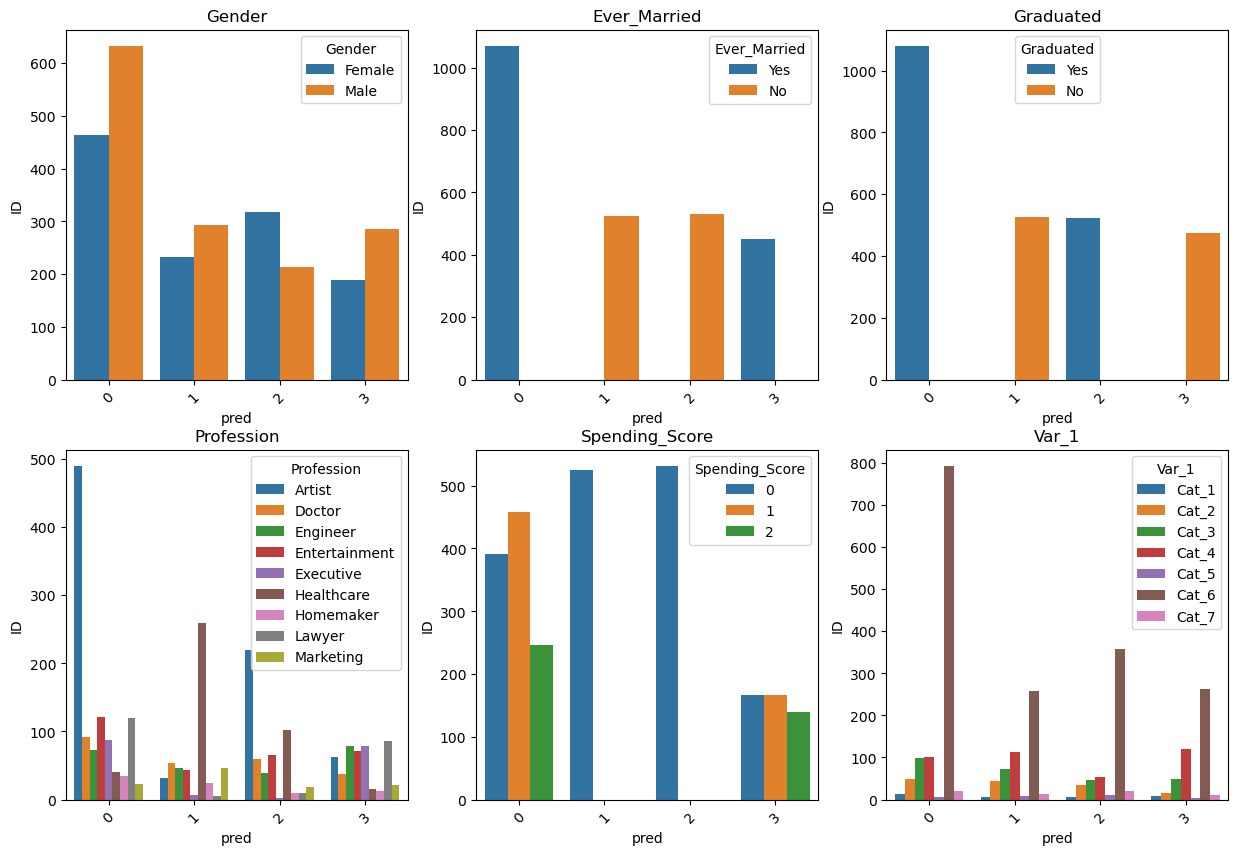

In [35]:

fig, axes = plt.subplots(nrows=2, ncols=round(len(cat_cols)/2), figsize=(15, 10))

for i, ax in enumerate(axes.flat):
    col = cat_cols[i]
    counts = final_test.groupby(["pred", col], as_index = False)["ID"].count()
    sns.barplot(final_test.groupby(["pred", col], as_index = False)["ID"].count(), x="pred", y="ID", hue=col, ax=ax)
    ax.set_title(col)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels by 45 degrees


Text(0.5, 0.98, 'Histograma de idade')

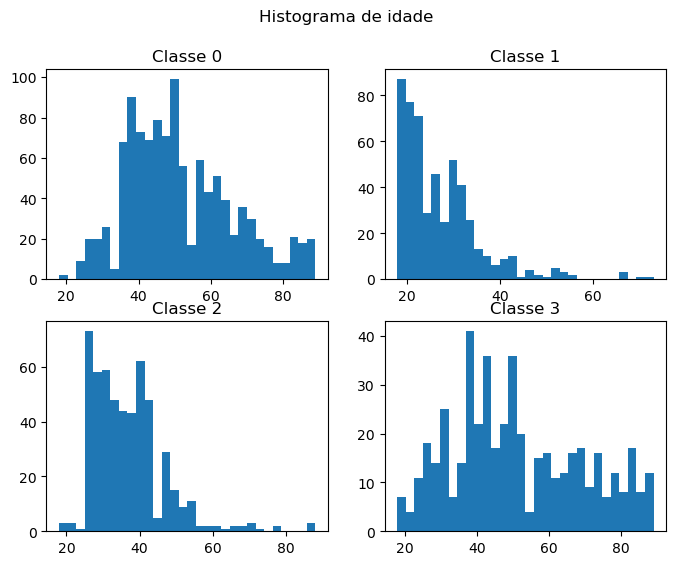

In [38]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

for i, ax in enumerate(axes.flat):
    ax.hist(final_test.loc[final_test.pred==i, "Age"], bins=30)
    ax.set_title("Classe "+str(i))

plt.suptitle("Histograma de idade")


Text(0.5, 0.98, 'Histograma de tamanho da família')

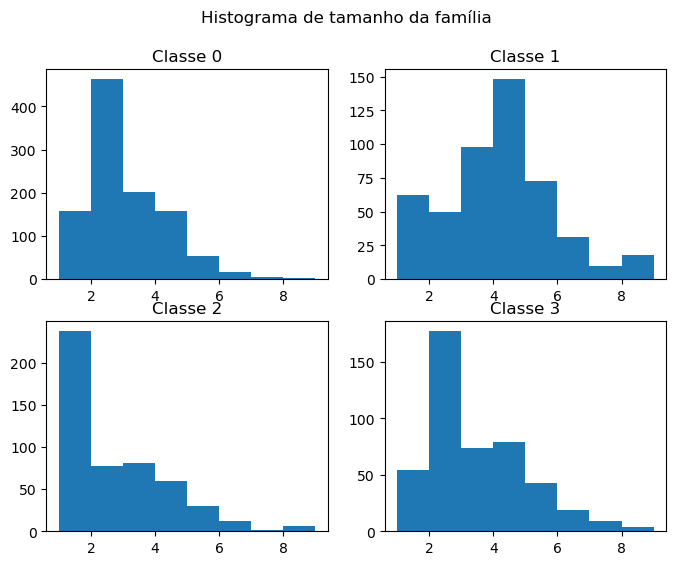

In [39]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

for i, ax in enumerate(axes.flat):
    ax.hist(final_test.loc[final_test.pred==i, "Family_Size"], bins=8)
    ax.set_title("Classe "+str(i))

plt.suptitle("Histograma de tamanho da família")


# Conclusão

- Encontramos 4 avatares para direcionar as estratégias de marketing e vendas, definindo o melhor produto para cada um
- O novo mercado replica o comportamento do antigo em diversos aspectos, então a aproximação dos segmentos é válida e deve ser implementada

**ATENÇAO**: Você achou esse case difícil, extremamente manual e em alguns momentos não sabia se estava indo pelo caminho certo? Parabéns! Você passou pelo processo REALÍSTICO de criar um modelo de clusterização alinhado ao negócio. Num cenário real, você teria diversas iterações com os analistas de negócio para encontrar segmentos significativos e valorosos e, obviamente, não teria que fazer tudo sozinho. O principal em cases assim é garantir uma comunicação constante e alinhar o passo a passo com os "stakeholders" que vão receber ou se utilizar do seu resultado.